### Download shape file here: https://www.census.gov/geographies/mapping-files/time-series/geo/cartographic-boundary.html

In [3]:
import geopandas as gpd
df_map = gpd.read_file('../../Florida-zipcodes-csv/cb_2020_us_zcta520_500k.shp')
df_map.head()

,ZCTA5CE20,AFFGEOID20,GEOID20,NAME20,LSAD20,ALAND20,AWATER20,geometry
0,35768,8600000US35768,35768,35768,Z5,446231990,3736014,"POLYGON ((-86.23269 34.61473, -86.22193 34.615..."
1,90292,8600000US90292,90292,90292,Z5,5428685,2857097,"POLYGON ((-118.46654 33.97922, -118.46586 33.9..."
2,33034,8600000US33034,33034,33034,Z5,3038252240,210248743,"MULTIPOLYGON (((-80.47729 25.46617, -80.47425 ..."
3,33019,8600000US33019,33019,33019,Z5,9699756,5258379,"POLYGON ((-80.13608 26.02641, -80.13500 26.028..."
4,96022,8600000US96022,96022,96022,Z5,643808118,1490837,"POLYGON ((-122.72346 40.36254, -122.72050 40.3..."


In [4]:
ZIPS = ['33510', '33511', '33527', '33534', '33547', '33548', '33549', '33556', '33558', '33559', '33563', '33565',
            '33566', '33567', '33569', '33570', '33572', '33573', '33578', '33579', '33584', '33592', '33594', '33596',
            '33598', '33602', '33603', '33604', '33605', '33606', '33607', '33609', '33610', '33611', '33612', '33613',
            '33614', '33615', '33616', '33617', '33618', '33619', '33624', '33625', '33626', '33629', '33634', '33635',
            '33637', '33647']

In [5]:
hillsborough=df_map[df_map['ZCTA5CE20'].isin(ZIPS)]
hillsborough.rename(columns={'ZCTA5CE20':'zipcode'}, inplace=True)
#hillsborough

C:\Users\sookim\AppData\Local\Temp\ipykernel_33532\2855578563.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hillsborough.rename(columns={'ZCTA5CE20':'zipcode'}, inplace=True)


In [6]:
hillsborough['zip_code'] = hillsborough['zipcode'].astype('str')
hillsborough['zip_code'] = hillsborough['zip_code'].str.pad(5, 'left', '0')
hillsborough['zip_code'] = hillsborough['zip_code'].str.slice(0,3)
hillsborough['zip_code'] = hillsborough['zip_code'].str.pad(5, 'right', 'x')

C:\Users\sookim\Anaconda3\envs\abm-py39\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [7]:
from uszipcode import SearchEngine

search = SearchEngine(simple_or_comprehensive=SearchEngine.SimpleOrComprehensiveArgEnum.simple)
zipcode = search.by_zipcode("33647")
zipcode

C:\Users\sookim\Anaconda3\envs\abm-py39\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


SimpleZipcode(zipcode='33647', zipcode_type='STANDARD', major_city='Tampa', post_office_city='Tampa, FL', common_city_list=['Tampa', 'Tampa Palms'], county='Hillsborough County', state='FL', lat=28.13, lng=-82.35, timezone='America/New_York', radius_in_miles=6.0, area_code_list='813', population=55034, population_density=1624.0, land_area_in_sqmi=33.89, water_area_in_sqmi=1.51, housing_units=22854, occupied_housing_units=20585, median_home_value=249000, median_household_income=72131, bounds_west=-82.427851, bounds_east=-82.259741, bounds_north=28.1715, bounds_south=28.072917)

In [8]:
hillsborough['state'] = hillsborough.apply(lambda row: search.by_zipcode(row.zipcode).state, axis=1)
hillsborough['county'] = hillsborough.apply(lambda row: search.by_zipcode(row.zipcode).county, axis=1)
#hillsborough

C:\Users\sookim\Anaconda3\envs\abm-py39\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\sookim\Anaconda3\envs\abm-py39\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [10]:
import pandas as pd
import random
df_redlines=pd.DataFrame(ZIPS, columns=['zipcode'])

df_redlines['zip_area']=[random.random() for x in range(len(ZIPS))]
df_redlines

,zipcode,zip_area
0,33510,0.316910
1,33511,0.074893
2,33527,0.524838
3,33534,0.792902
4,33547,0.284551
5,33548,0.822195
6,33549,0.436212
7,33556,0.872168
8,33558,0.228915
9,33559,0.528576


In [12]:
import matplotlib.pyplot as plt

df_redlines_maps = hillsborough.merge(df_redlines, on='zipcode', how='left')
dfm = df_redlines_maps[df_redlines_maps.zip_area>0]
#dfm

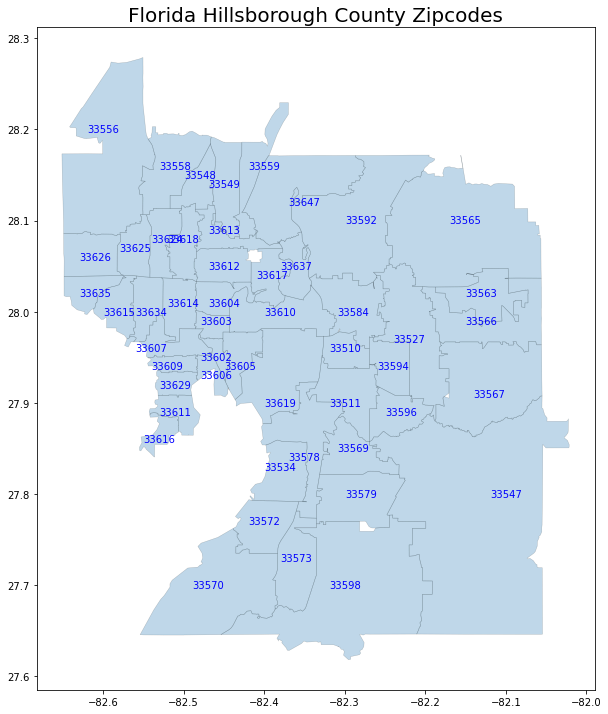

In [13]:


fig, ax = plt.subplots(1, figsize=(10, 20))
dfm.plot(marker='o', facecolors='none', edgecolors='black', linewidth=0.5, markersize=100, alpha=.2, ax=ax)
dfm.plot(ax=ax, alpha=.1)
#ax.axis('off')
ax.set_title('Florida Hillsborough County Zipcodes', fontdict={'fontsize': '20', 'fontweight' : '3'})

ZIPS_centers={ '33510':[27.96, -82.30], 
                '33511':[27.90, -82.30],
                '33527':[27.97, -82.22],
                '33534':[27.83, -82.38],
                '33547':[27.8, -82.1],
                '33548':[28.15, -82.48],
                '33549':[28.14, -82.45],
                '33556':[28.2, -82.6],
                '33558':[28.16, -82.51],
                '33559':[28.16, -82.40],
                '33563':[28.02, -82.13],
                '33565':[28.10, -82.15],
                '33566':[27.99, -82.13],
                '33567':[27.91, -82.12],
                '33569':[27.85, -82.29],
                '33570':[27.70, -82.47],
                '33572':[27.77, -82.40],
                '33573':[27.73, -82.36],
                '33578':[27.84, -82.35],
                '33579':[27.80, -82.28],
                '33584':[28.00, -82.29],
                '33592':[28.10, -82.28],
                '33594':[27.94, -82.24],
                '33596':[27.89, -82.23],
                '33598':[27.7, -82.3],
                '33602':[27.95, -82.46],
                '33603':[27.99, -82.46],
                '33604':[28.01, -82.45],
                '33605':[27.94, -82.43],
                '33606':[27.93, -82.46],
                '33607':[27.96, -82.54],
                '33609':[27.94, -82.52],
                '33610':[28.00, -82.38],
                '33611':[27.89, -82.51],
                '33612':[28.05, -82.45],
                '33613':[28.09, -82.45],
                '33614':[28.01, -82.50],
                '33615':[28.00, -82.58],
                '33616':[27.86, -82.53],
                '33617':[28.04, -82.39],
                '33618':[28.08, -82.50],
                '33619':[27.90, -82.38],
                '33624':[28.08, -82.52],
                '33625':[28.07, -82.56],
                '33626':[28.06, -82.61],
                '33629':[27.92, -82.51],
                '33634':[28.00, -82.54],
                '33635':[28.02, -82.61],
                '33637':[28.05, -82.36],
                '33647':[28.12, -82.35]}
for z in range(len(ZIPS)):
    text = ax.text(ZIPS_centers[ZIPS[z]][1], ZIPS_centers[ZIPS[z]][0], str(ZIPS[z]), ha="center", va="center", color="b")